<a href="https://colab.research.google.com/github/HeadHunter28/DeepLearning/blob/main/Diabetes%20prediction%20using%20ML%20%5C%20DL%20(Keras)%20%5CDiabetes_prediction_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes prediction using Keras

---

##### Link to dataset : http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

##### About the dataset :    

Attributes: (all numeric-valued)
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (outcome) (0 or 1)

---

- Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

----

- Loading the dataset

In [ ]:
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]

diabetes_df = pd.read_csv('diabetes .csv', names=names, header = 0)

In [ ]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetes_data.shape)
diabetes_data.sample(5)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
269,2,146,0,0,0,27.5,0.240,28,1
310,6,80,66,30,0,26.2,0.313,41,0
749,6,162,62,0,0,24.3,0.178,50,1
213,0,140,65,26,130,42.6,0.431,24,1
584,8,124,76,24,600,28.7,0.687,52,1


---

- Dividing into input and target output features :

In [13]:
X = diabetes_df.iloc[:, :-1].values

y = diabetes_df["has_diabetes"].values

- Splitting to train and test data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

- Defining helper function for visualising ROC curve :

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

- Generating normalized instances of the data :

In [29]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

---

### Model training and prediction :

1. Using traditional machine learning methods as a baseline

2. Using neural network with one hidden layer

3. Using neural network with two hidden layer

---

1.1 Using Random Forest model

In [15]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

-- Checking accuracy

In [16]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.822


-- ROC curve

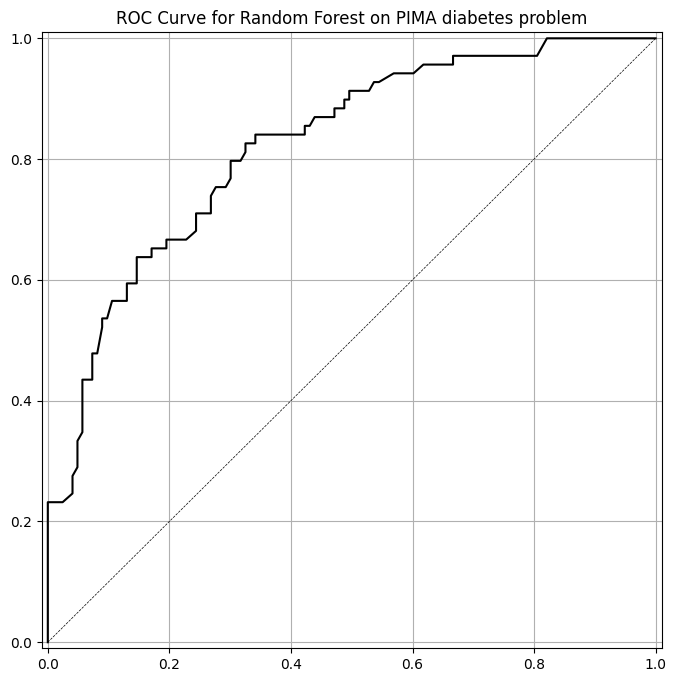

In [26]:
plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forest')


----

 1.2 Using XGBoost model

In [21]:
xgbm = xgb.XGBClassifier(objective="binary:logistic",seed=42)
xgbm.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
xgpred = xgbm.predict(X_test)

In [23]:
accuracy1 = accuracy_score(y_test, xgpred)
print("Accuracy:", accuracy1)

Accuracy: 0.765625


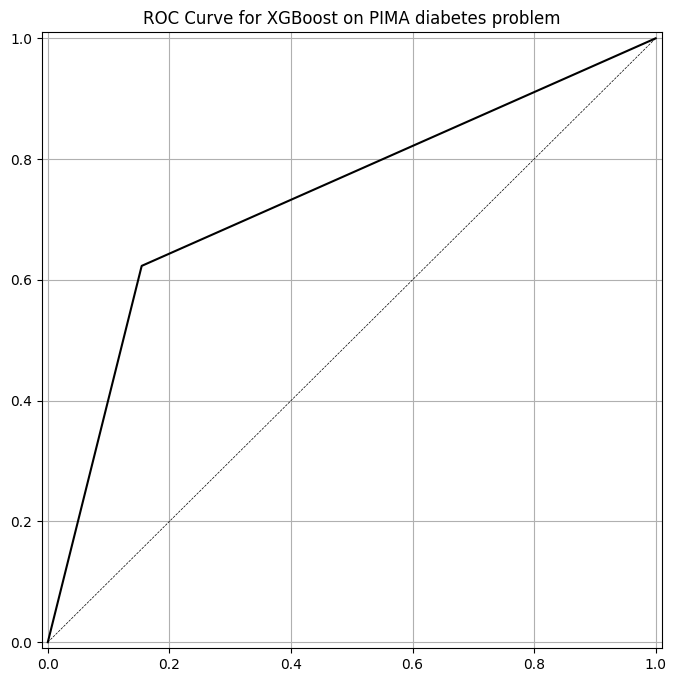

In [27]:
plot_roc(y_test, xgpred, 'XGBoost')


---

---

2. Using a single layer neural network

- The input has 8 features : dimension (8*1), shape = (8,)

- NN will have one single hidden layer with 12 nodes with sigmoid activation function

- The final layer will have one node with sigmoid function

---

Creating the network :

In [56]:
neural_net1 = Sequential()

Adding the first (hidden) and final layer :

In [57]:
neural_net1.add(Dense(12,input_shape=(8,),activation='sigmoid'))

In [58]:
neural_net1.add(Dense(1,activation='sigmoid'))

- Checking the model :

In [59]:
neural_net1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                108       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Completing and compiling the model (connecting the architecture we defined ) with

   1. <b> Optimizer </b> : SGD (Stochastic Gradient) with learning rate = 0.003

   2. <b> Loss Function </b> : Binary crossentropy (common choice for binary classification)


In [60]:
neural_net1.compile(SGD(learning_rate=.003),"binary_crossentropy",metrics=["accuracy"])

- Fitting the model on the normalised training data for 300 iterations (epochs)

  The fit function also generates the model's run history.

In [61]:
run_hist_1 = neural_net1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300)


Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 0.6228 - accuracy: 0.6545 - val_loss: 0.6322 - val_accuracy: 0.6406
Epoch 2/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6545 - val_loss: 0.6311 - val_accuracy: 0.6406
Epoch 3/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6207 - accuracy: 0.6545 - val_loss: 0.6300 - val_accuracy: 0.6406
Epoch 4/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6197 - accuracy: 0.6545 - val_loss: 0.6289 - val_accuracy: 0.6406
Epoch 5/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6187 - accuracy: 0.6545 - val_loss: 0.6279 - val_accuracy: 0.6406
Epoch 6/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.6545 - val_loss: 0.6269 - val_accuracy: 0.6406
Epoch 7/300
18/18 [==============================] - 0s 4ms/step - loss: 0.6169 - accuracy: 0.6545 - val_loss: 0.6260 - val_accuracy: 0.6406
Epoch 8/300


- Generating predictions

   Predictions are probabilistic (values between 0-1), we can convert them to definite predictions (0/1).


In [62]:
# Probabilistic predictions
pred_prob_nn_1 = neural_net1.predict(X_test_norm)



6/6 [==============================] - 0s 2ms/step


- Considering threshold being 0.5, converting the probabilities to definite probabilites by rounding up or down :

In [63]:
pred_classes_nn_1 = np.round(pred_prob_nn_1)

In [64]:
print(pred_classes_nn_1)

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.

- Checking model performance and visualising ROC:

In [65]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,pred_classes_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,pred_classes_nn_1)))

accuracy is 0.755
roc-auc is 0.707


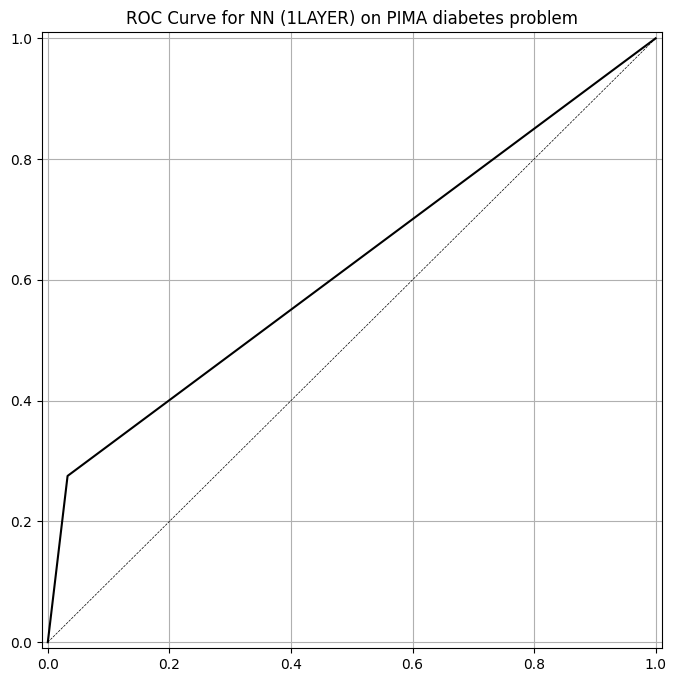

In [51]:
plot_roc(y_test,pred_classes_nn_1, 'NN (1LAYER)')

- Checking the model's training history and the loss values



In [66]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

- Plotting the training loss and validation loss over all the epochs :

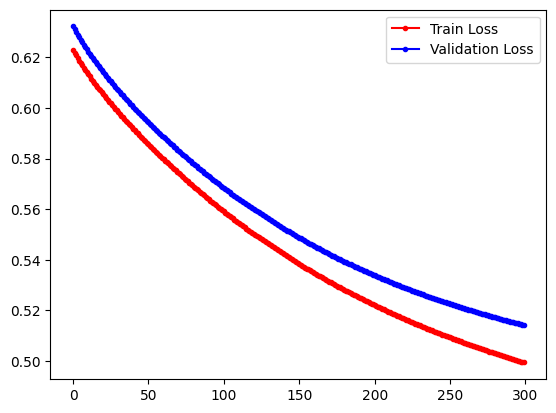

In [67]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

**Both losses seem to be going down as the number of epochs increases**.

If we increase the number of epochs, i.e. train the network more, the loss values will become lower.

- Fitting the model for 900 more epochs
  (training continues from where previous training of 300 epochs ended) :

In [69]:
run_hist_1b = neural_net1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=900)

Epoch 1/900
18/18 [==============================] - 0s 24ms/step - loss: 0.4992 - accuracy: 0.7604 - val_loss: 0.5141 - val_accuracy: 0.7552
Epoch 2/900
18/18 [==============================] - 0s 12ms/step - loss: 0.4990 - accuracy: 0.7622 - val_loss: 0.5139 - val_accuracy: 0.7552
Epoch 3/900
18/18 [==============================] - 0s 8ms/step - loss: 0.4989 - accuracy: 0.7604 - val_loss: 0.5138 - val_accuracy: 0.7552
Epoch 4/900
18/18 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7604 - val_loss: 0.5136 - val_accuracy: 0.7552
Epoch 5/900
18/18 [==============================] - 0s 4ms/step - loss: 0.4985 - accuracy: 0.7604 - val_loss: 0.5135 - val_accuracy: 0.7552
Epoch 6/900
18/18 [==============================] - 0s 4ms/step - loss: 0.4983 - accuracy: 0.7622 - val_loss: 0.5134 - val_accuracy: 0.7552
Epoch 7/900
18/18 [==============================] - 0s 4ms/step - loss: 0.4982 - accuracy: 0.7604 - val_loss: 0.5132 - val_accuracy: 0.7552
Epoch 8/900

- Checking model training history and visualising its training and validation over all the epochs of training combined :

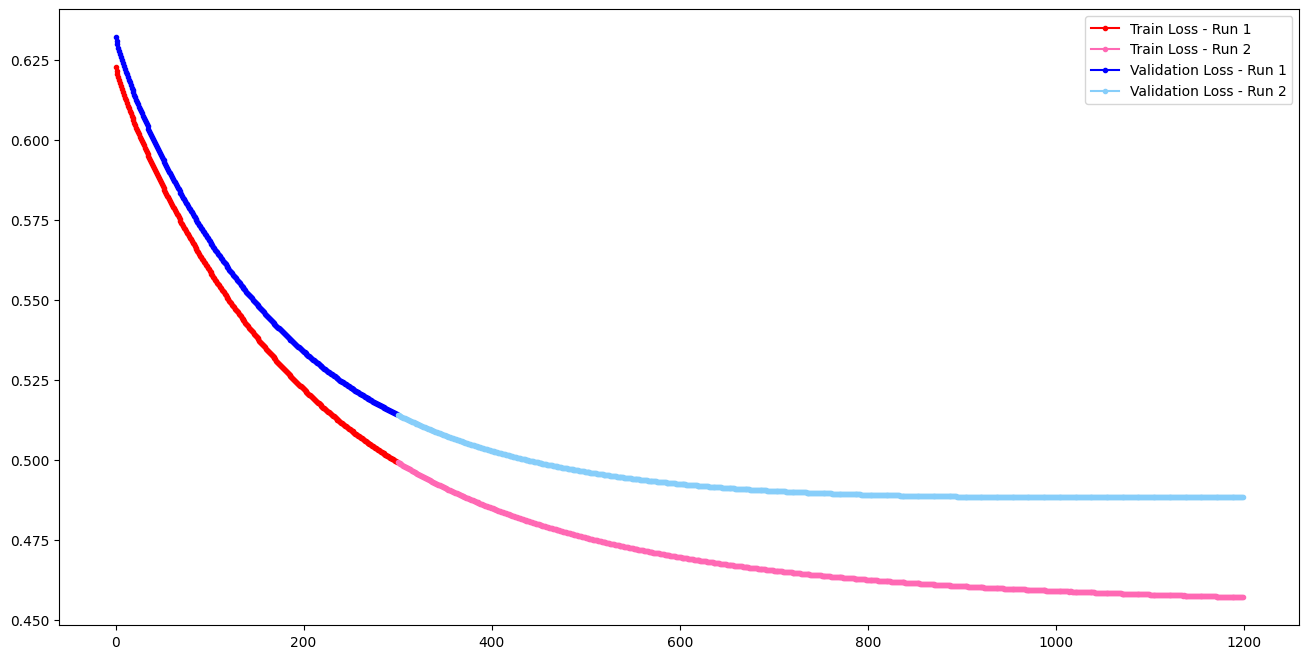

In [70]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

The train loss is decreasing as the number of epochs increases.

But validation loss stopped decreasing between the 400-600 epoch, and is even increasing visibly.

It is suffice to say the neural network will not benefit from further training.


---

3. Using a neural network with two hidden layers

-  Both hidden layers have 6 nodes and use the 'ReLU' activation function

-  The final layer has one node and the 'Sigmoid' activation function

- The network will use the Stochastic gradient optimiser with learning rate of 0.003

- The network will be training for 1500 epochs

---

- Define the network :

In [72]:
neural_net2 = Sequential()

- Adding the hidden layers :

In [74]:
#Input layer
neural_net2.add(Dense(6,input_shape=(8,),activation="relu"))

neural_net2.add(Dense(6,activation="relu"))

- Adding the final layer :

In [75]:
neural_net2.add(Dense(1,activation="sigmoid"))

- Compling the model :

In [77]:
neural_net2.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])


- Fitting the model for 1500 epochs and generating history :

In [78]:
run_hist_2 = neural_net2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.6535 - accuracy: 0.6753 - val_loss: 0.6682 - val_accuracy: 0.6510
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6452 - accuracy: 0.6753 - val_loss: 0.6592 - val_accuracy: 0.6562
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6377 - accuracy: 0.6736 - val_loss: 0.6510 - val_accuracy: 0.6458
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.6684 - val_loss: 0.6434 - val_accuracy: 0.6458
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6234 - accuracy: 0.6684 - val_loss: 0.6363 - val_accuracy: 0.6458
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.6684 - val_loss: 0.6294 - val_accuracy: 0.6458
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.6100 - accuracy: 0.6719 - val_loss: 0.6229 - val_accuracy: 0.6510
Epoch

- Visualing losses as well as accuracy over the epochs :

In [79]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

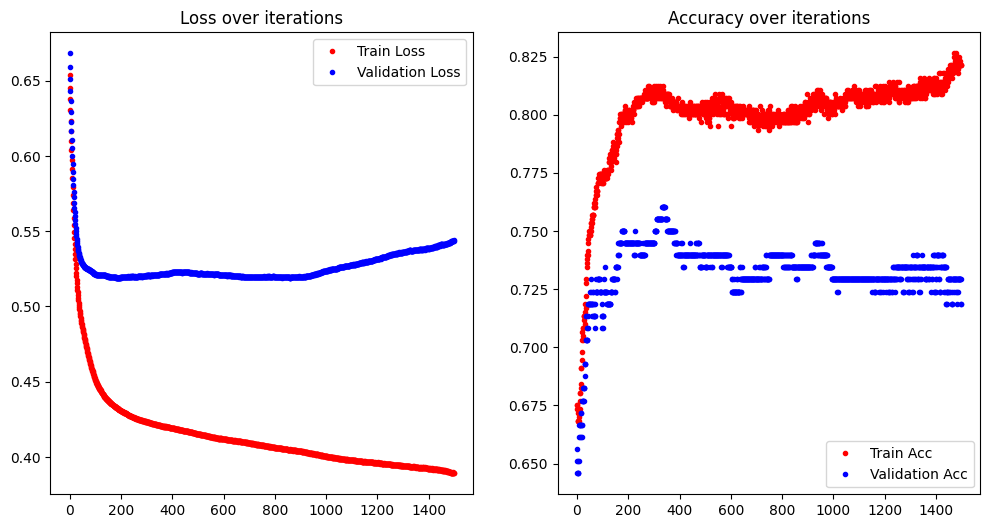

In [81]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

- The losses seem to follow the pattern obeserved in the previous neural network,
the training loss keeps decreasing, but the validation loss stops decreasing early on, and is seen to incease eventually.

- The training accuracy is seen to increase over the epochs, rising sharply upto the 400th epochs, then plateauing and rising slowly.

- Validation accuracy rises sharply towards the 400th epoch, but plateaus and decreases going forwards. This means the model is getting better at unseen data.

This situation is leaning towards overfitting, so we will stop model training.

- Generating predctions, converting to classes,finding accuracy and ROC:

In [84]:
y_pred_prob_nn_2 = neural_net2.predict(X_test_norm)
pred_classes_nn_2 = np.round(y_pred_prob_nn_2)

print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,pred_classes_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,pred_classes_nn_2)))

6/6 [==============================] - 0s 3ms/step

accuracy is 0.729
roc-auc is 0.696


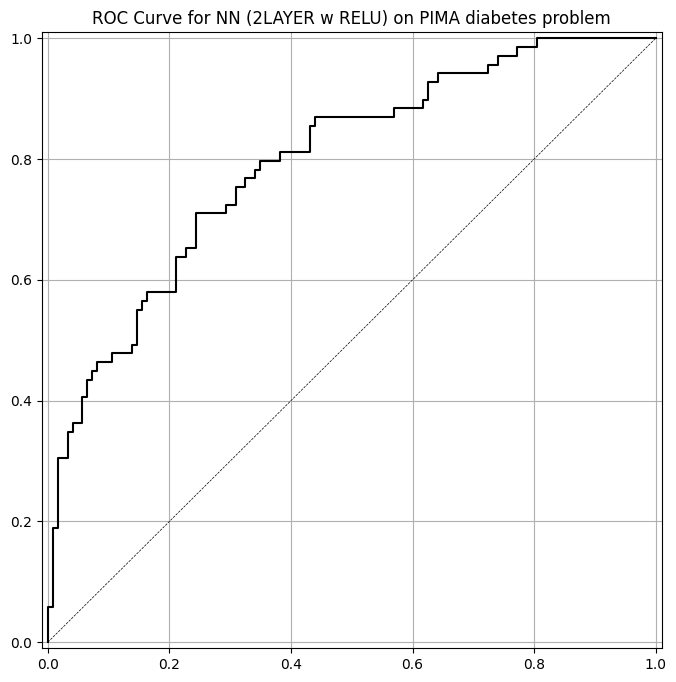

In [85]:
plot_roc(y_test, y_pred_prob_nn_2, 'NN (2LAYER w RELU)')

---